In [2]:
import sys
sys.path.append('../Modules')

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from DesignMat import Polynomial
from Classifier import VariationalLogistic

def create_data(add_outliers=False, add_class=False):
    x0 = np.random.normal(size=50).reshape(-1, 2) - 3.
    x1 = np.random.normal(size=50).reshape(-1, 2) + 3.
    return np.concatenate([x0, x1]), np.concatenate([np.zeros(25), np.ones(25)]).astype(np.int)

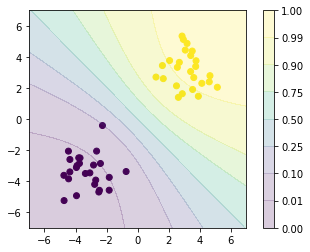

In [3]:
x_train, y_train = create_data()
x0, x1 = np.meshgrid(np.linspace(-7, 7, 100), np.linspace(-7, 7, 100))
x = np.array([x0, x1]).reshape(2, -1).T
X_train = Polynomial(1).dm(x_train)
X = Polynomial(1).dm(x)

vlr = VariationalLogistic()
vlr.fit(X_train, y_train)
y = vlr.prob(X).reshape(100, 100)

plt.scatter(x_train[:, 0], x_train[:, 1], c=y_train)
plt.contourf(x0, x1, y, np.array([0., 0.01, 0.1, 0.25, 0.5, 0.75, 0.9, 0.99, 1.]), alpha=0.2)
plt.colorbar()
plt.xlim(-7, 7)
plt.ylim(-7, 7)
plt.gca().set_aspect('equal', adjustable='box')
plt.show()